# Сравнение сортировок
## Загрузка данных из файлов

In [103]:
import csv
from numpy import sqrt as sqrt

In [104]:
const_x = []
const_y = []
first_x = []
first_y = []
sum_x = []
sum_y = []
rol_x = []
rol_y = []
ror_x = []
ror_y = []
gnu_x = []
gnu_y = []
crc32_x = []
crc32_y = []


with open("../stat/chains_sizes.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    
    for row in data:
        x = int(row[1])
        y = int(row[2]) 
        
        if (row[0] == "const hash"):
            const_x.append(x)
            const_y.append(y)
        elif (row[0] == "first_char_hash"):
            first_x.append(x)
            first_y.append(y)
        elif (row[0] == "char_sum_hash"):
            sum_x.append(x)
            sum_y.append(y)
        elif (row[0] == "rol_hash"):
            rol_x.append(x)
            rol_y.append(y)
        elif (row[0] == "ror_hash"):
            ror_x.append(x)
            ror_y.append(y)
        elif (row[0] == "gnu_hash"):
            gnu_x.append(x)
            gnu_y.append(y)
        elif (row[0] == "crc32_hash"):
            crc32_x.append(x)
            crc32_y.append(y)

In [105]:
const_time_x = []
const_time_y = []
first_time_x = []
first_time_y = []
sum_time_x = []
sum_time_y = []
rol_time_x = []
rol_time_y = []
ror_time_x = []
ror_time_y = []
gnu_time_x = []
gnu_time_y = []
crc32_time_x = []
crc32_time_y = []


with open("../stat/hash_times.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    
    for row in data:
        x = float(row[1]) 
        
        if (row[0] == "const hash"):
            const_time_x.append(x)
        elif (row[0] == "first_char_hash"):
            first_time_x.append(x)
        elif (row[0] == "char_sum_hash"):
            sum_time_x.append(x)
        elif (row[0] == "rol_hash"):
            rol_time_x.append(x)
        elif (row[0] == "ror_hash"):
            ror_time_x.append(x)
        elif (row[0] == "gnu_hash"):
            gnu_time_x.append(x)
        elif (row[0] == "crc32_hash"):
            crc32_time_x.append(x)

## Hashfuncs comparison

### Chains plots

In [106]:
DPI = 600
FIGSIZE=(15, 4)

In [107]:

import matplotlib.pyplot as plt
import json

def plot_func(x_coords, y_coords, name, x_max, y_max, width, x_min):
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    plt.title(name)
    
    plt.bar(x_coords, y_coords, width=width)
    
    plt.xlim([x_min, x_max])
    plt.ylim([0, y_max])
    plt.ylabel("Длина цепочки")
    plt.xlabel("Значение хеша")
    
    plt.savefig("images/{}.png".format(name))

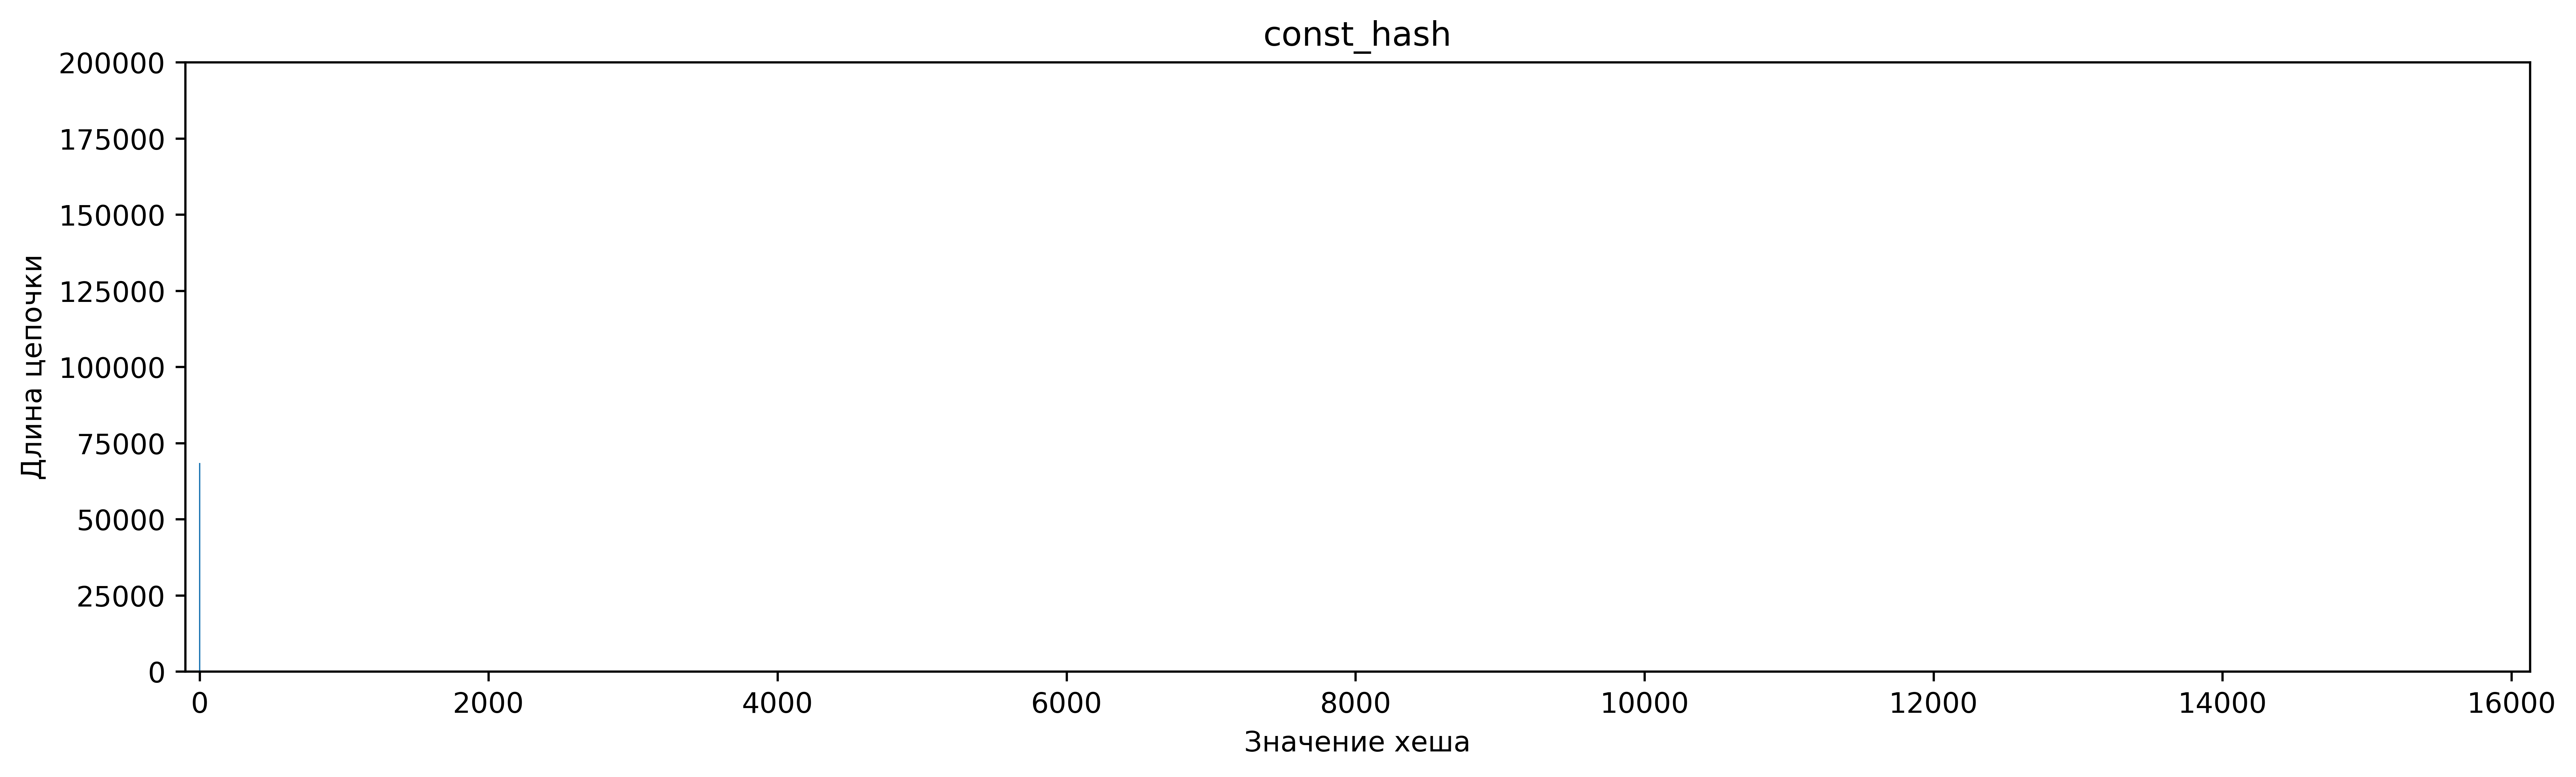

In [108]:
plot_func(const_x, const_y, "const_hash", 9901, 80000, 10, -100)

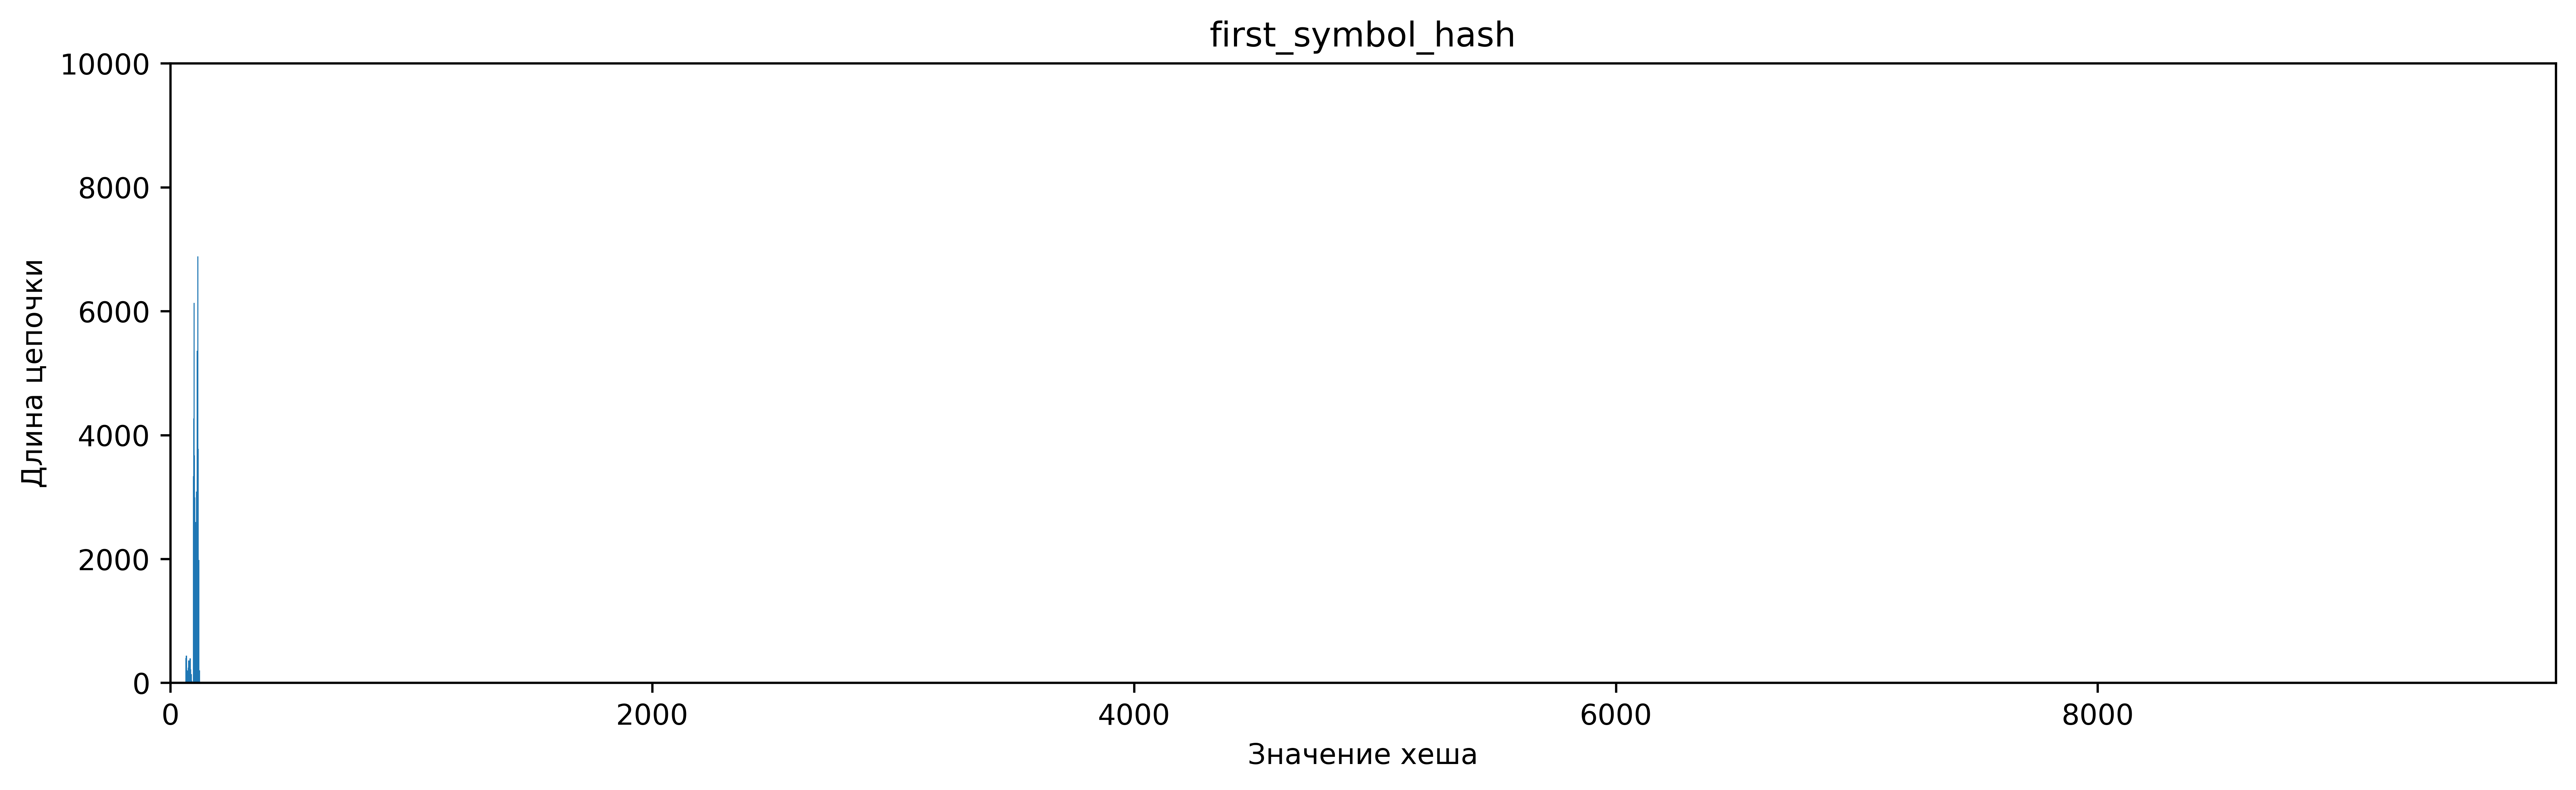

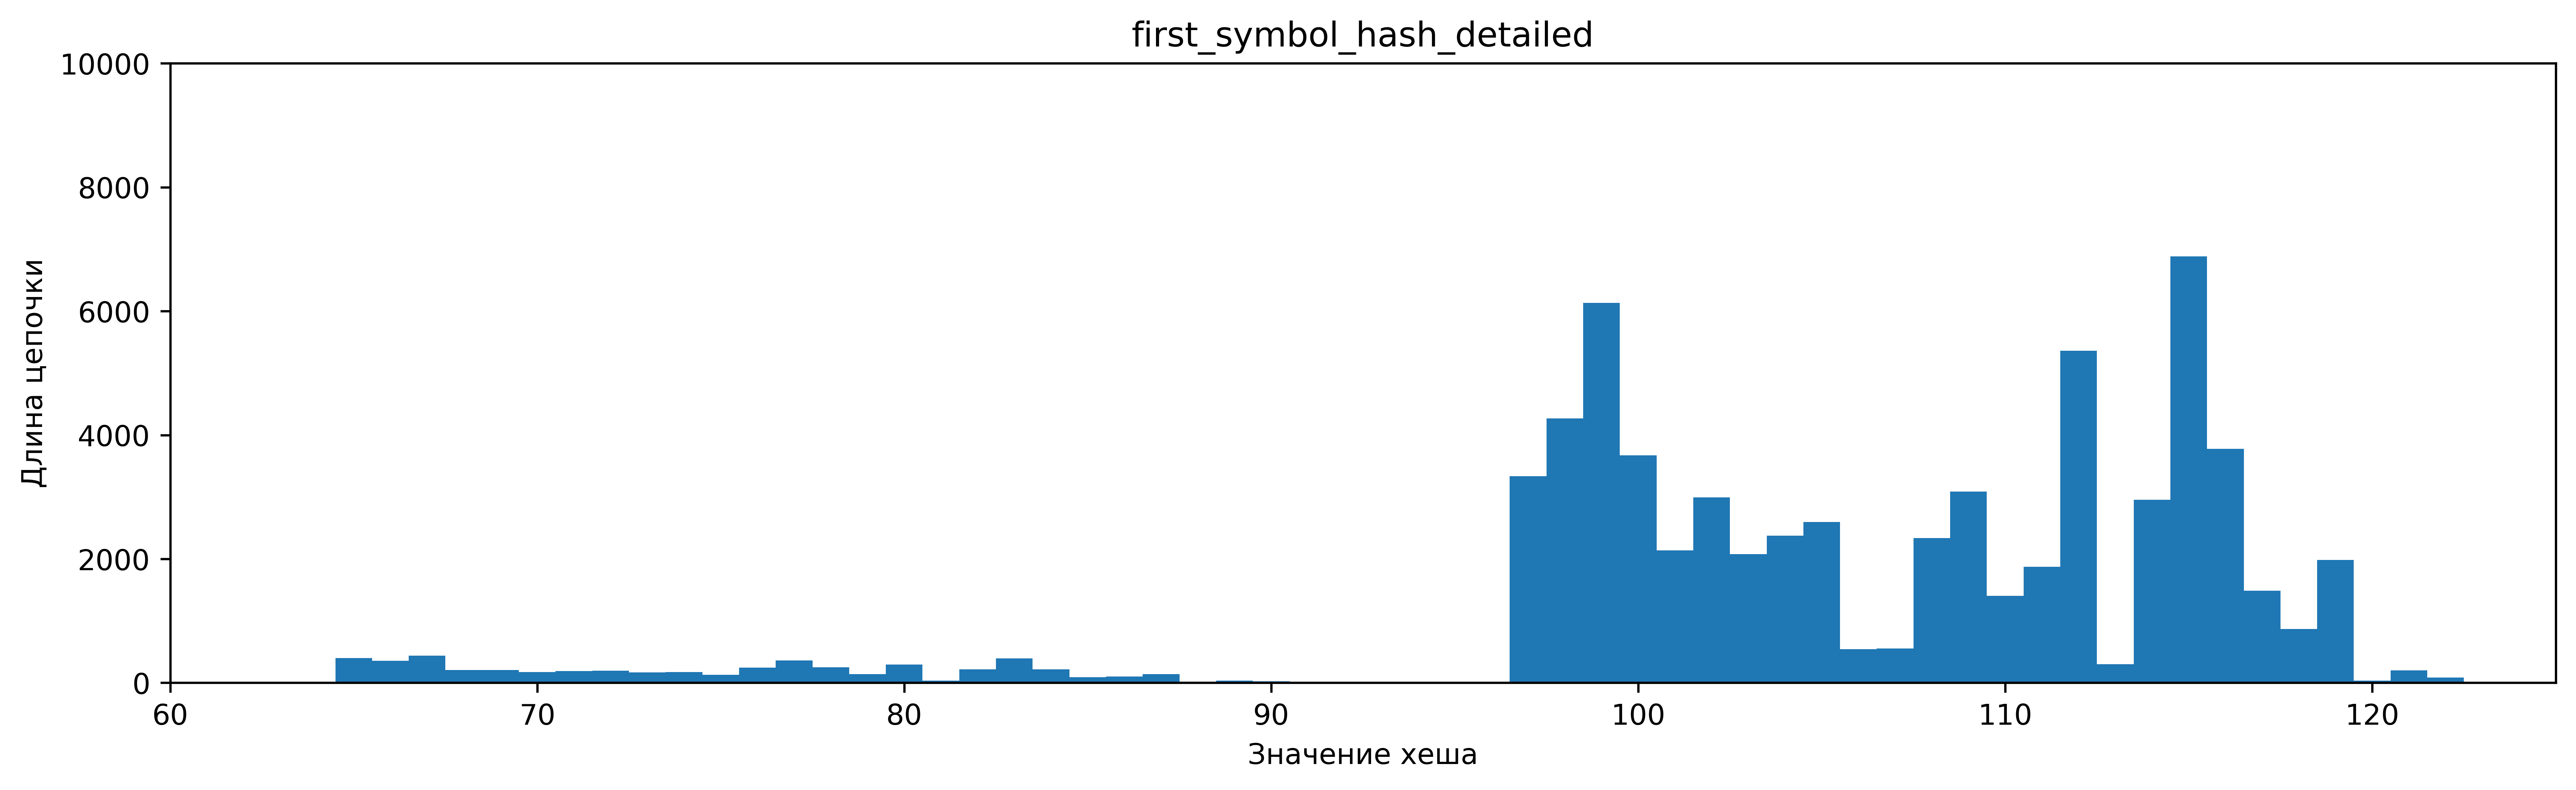

In [142]:
plot_func(first_x, first_y, "first_symbol_hash", 9901, 10000, 5, 0)
plot_func(first_x, first_y, "first_symbol_hash_detailed", 125, 10000, 1, 60)

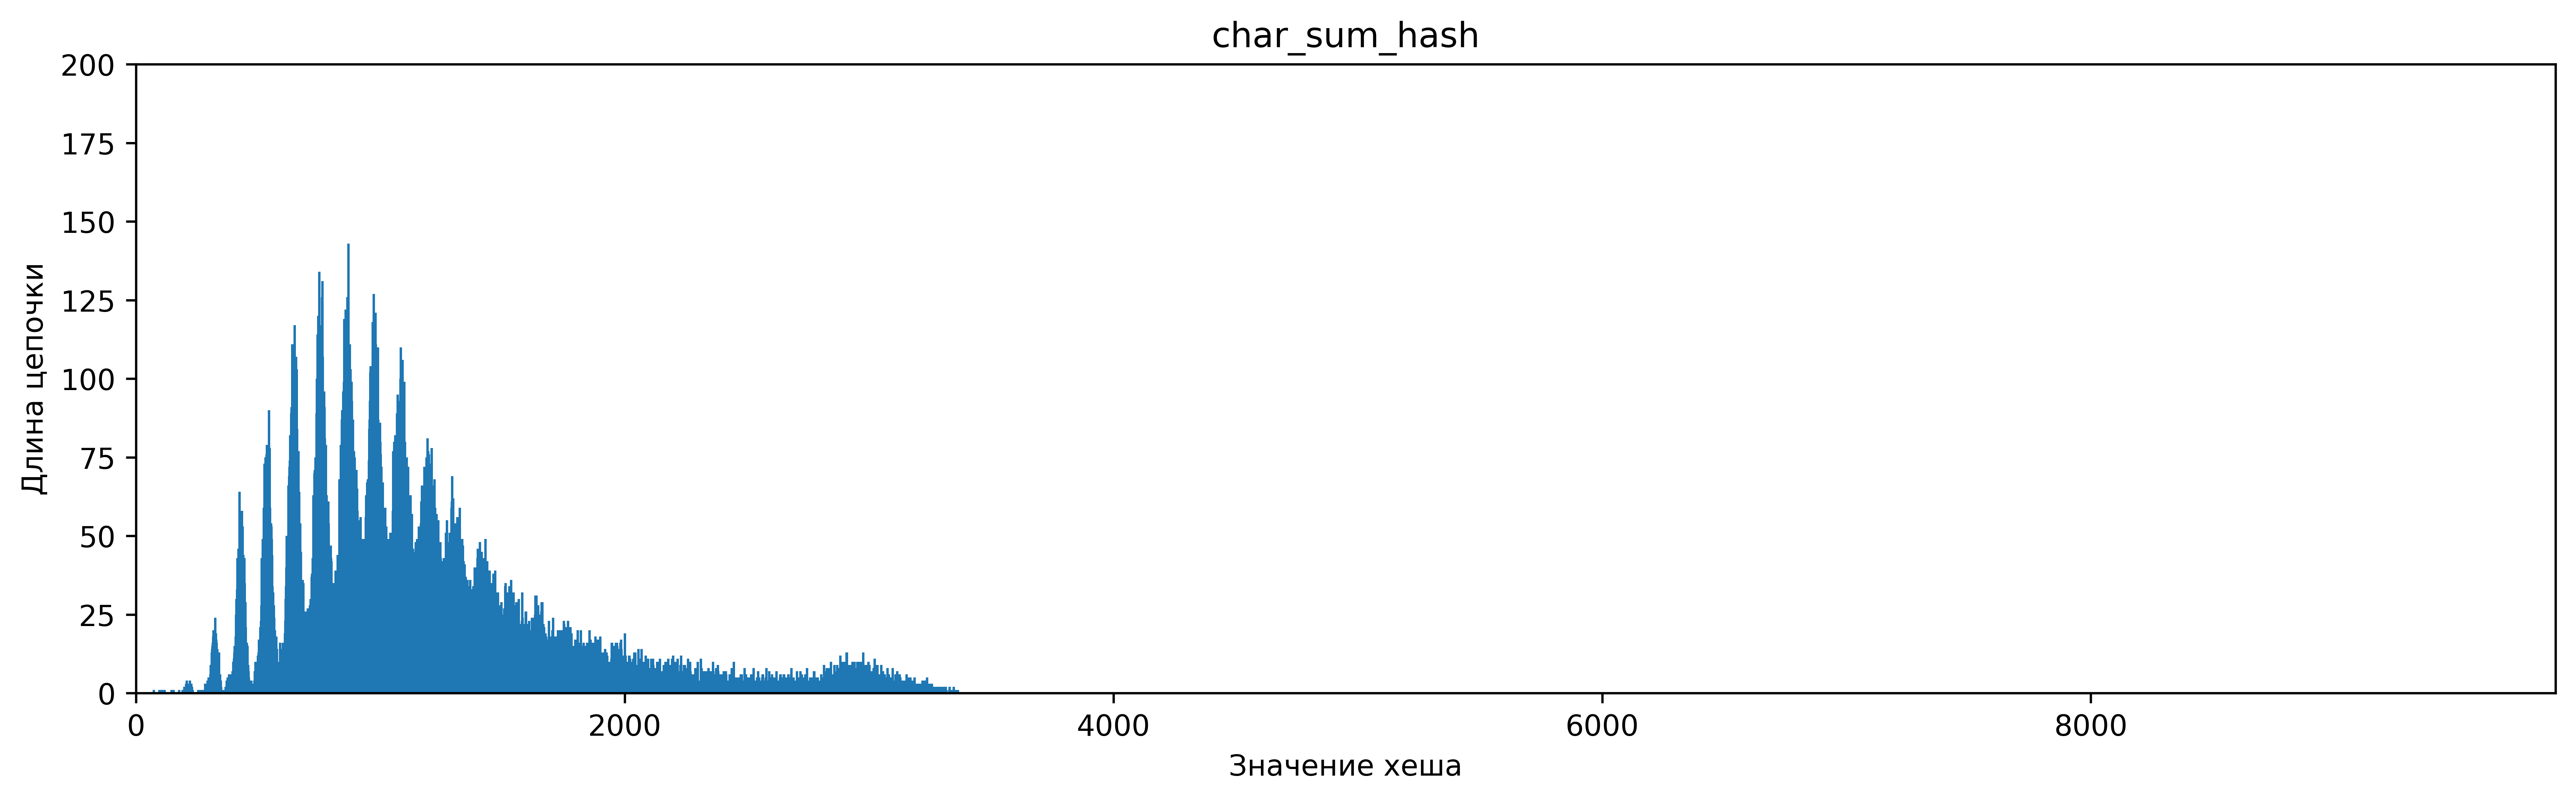

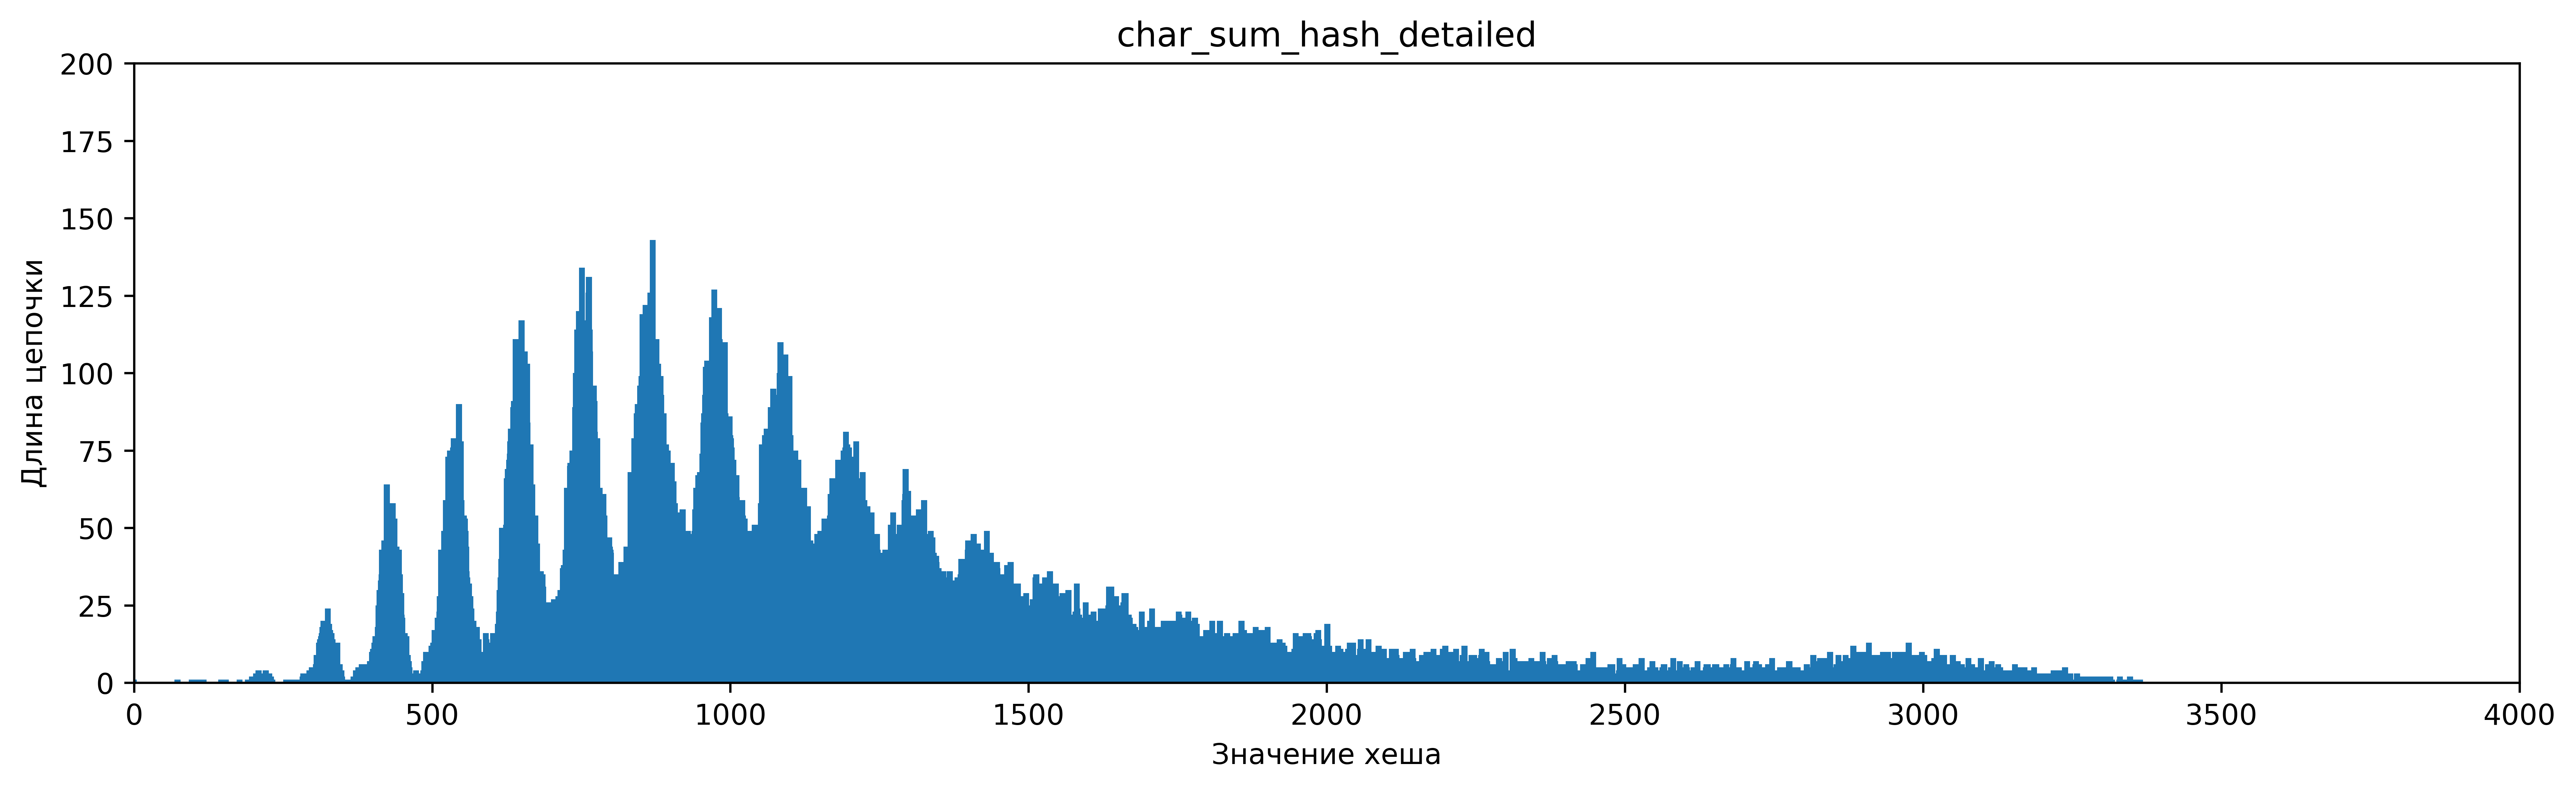

In [129]:
plot_func(sum_x, sum_y, "char_sum_hash", 9901, 200, 10, 0)
plot_func(sum_x, sum_y, "char_sum_hash_detailed", 4000, 200, 10, 0)

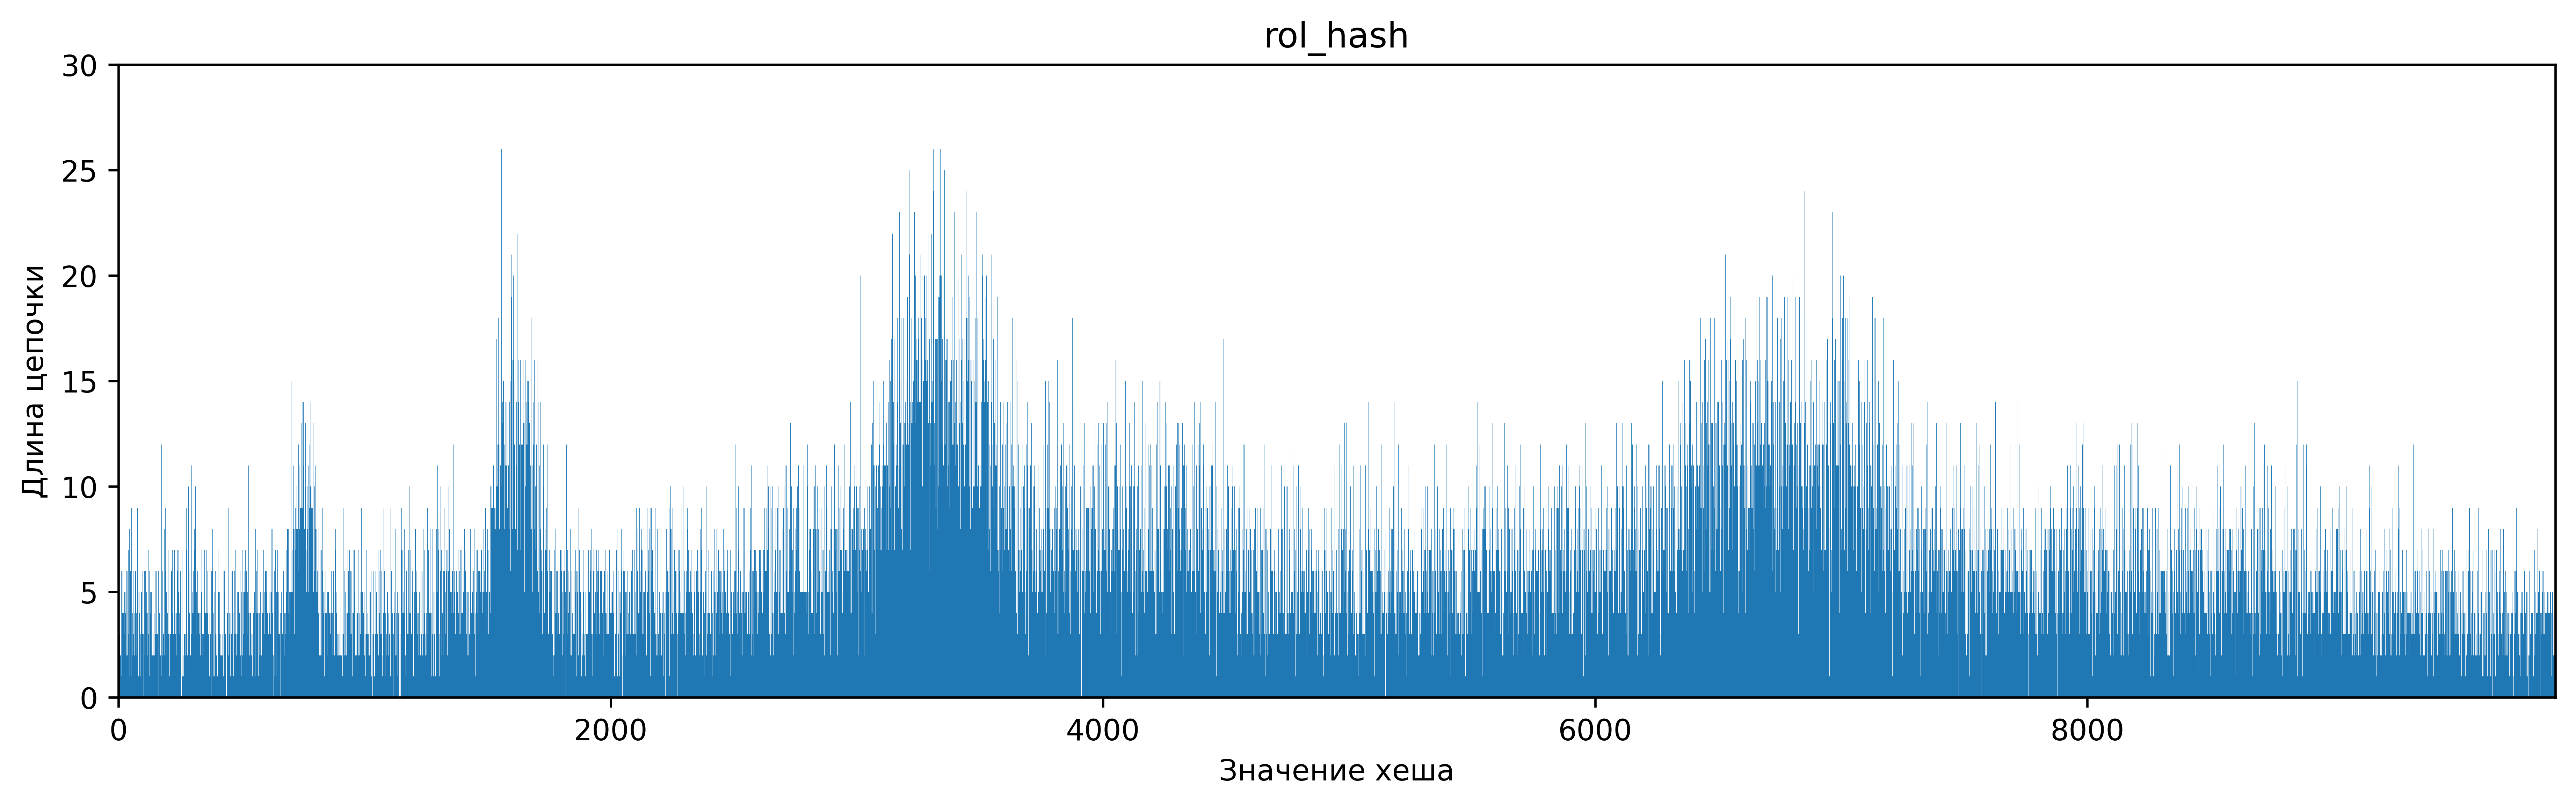

In [131]:
plot_func(rol_x, rol_y, "rol_hash", 9901, 30, 1, 0)

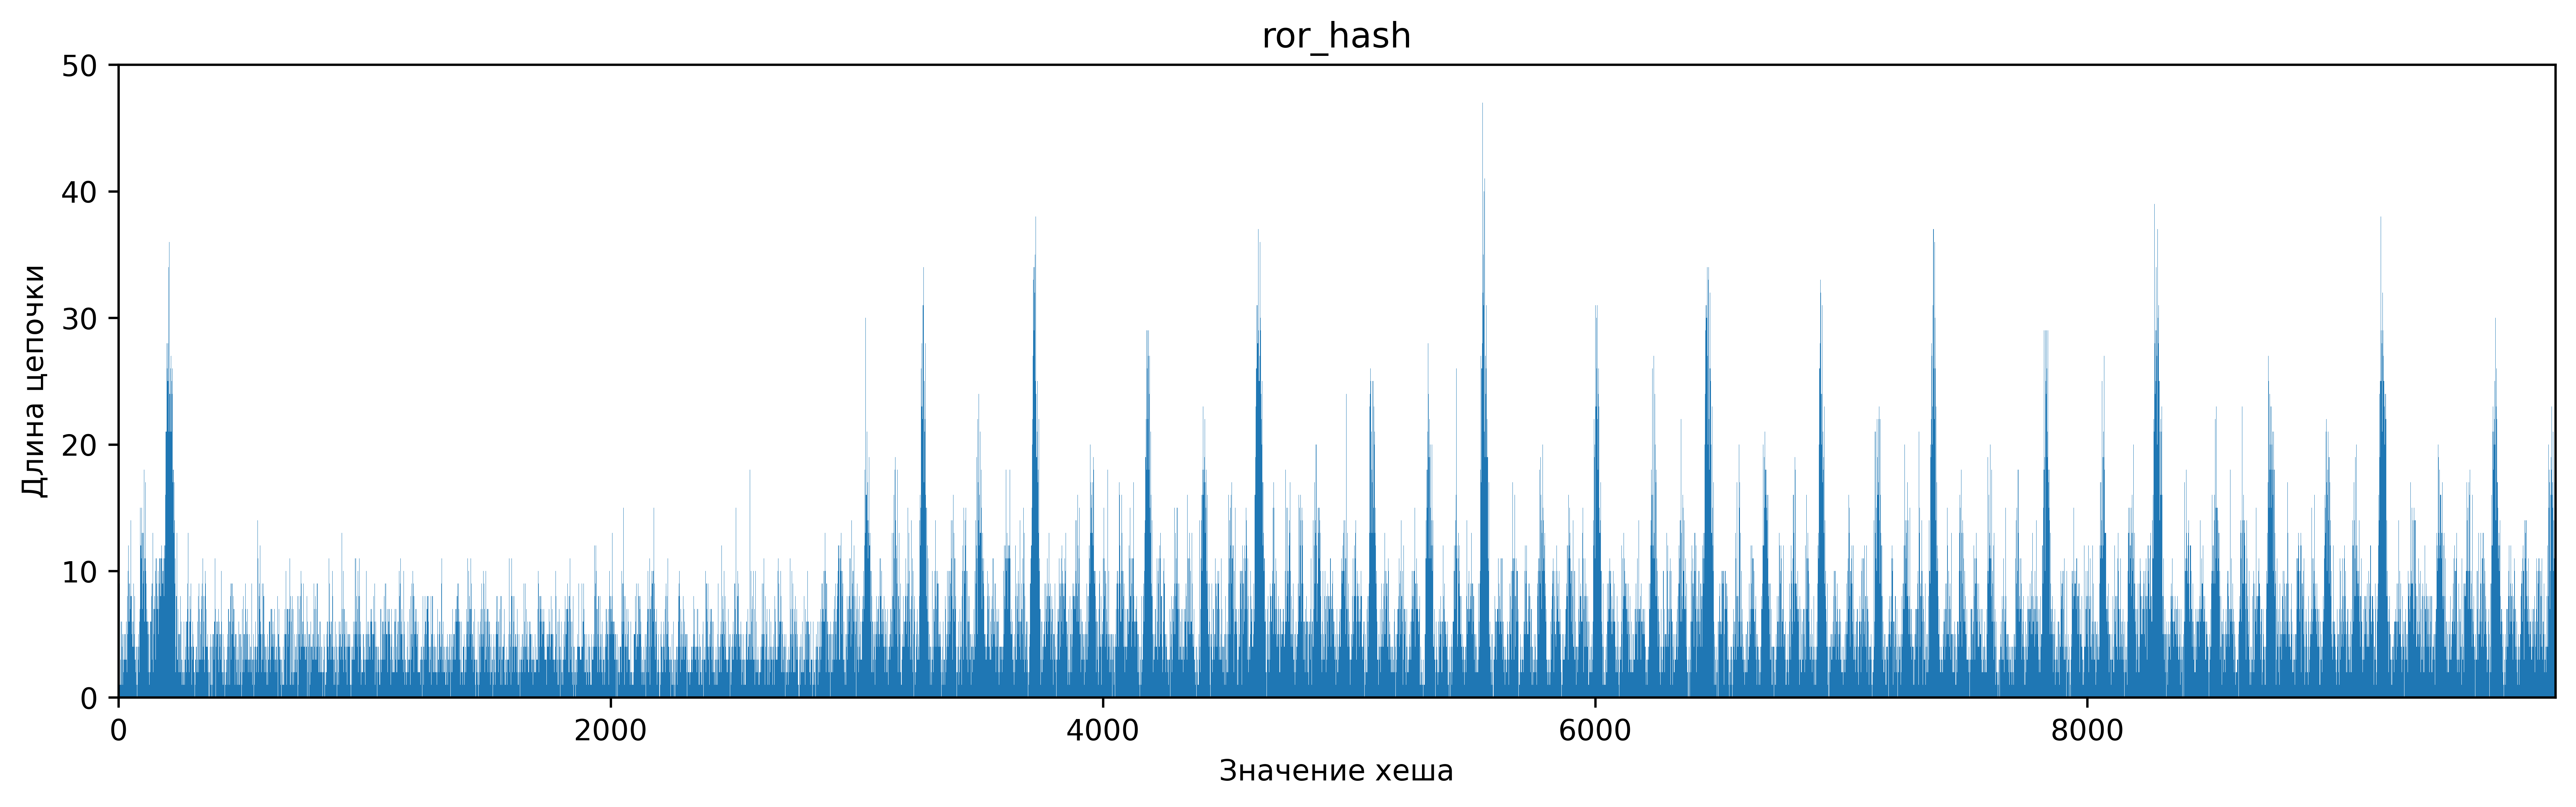

In [133]:
plot_func(ror_x, ror_y, "ror_hash", 9901, 50, 1, 0)

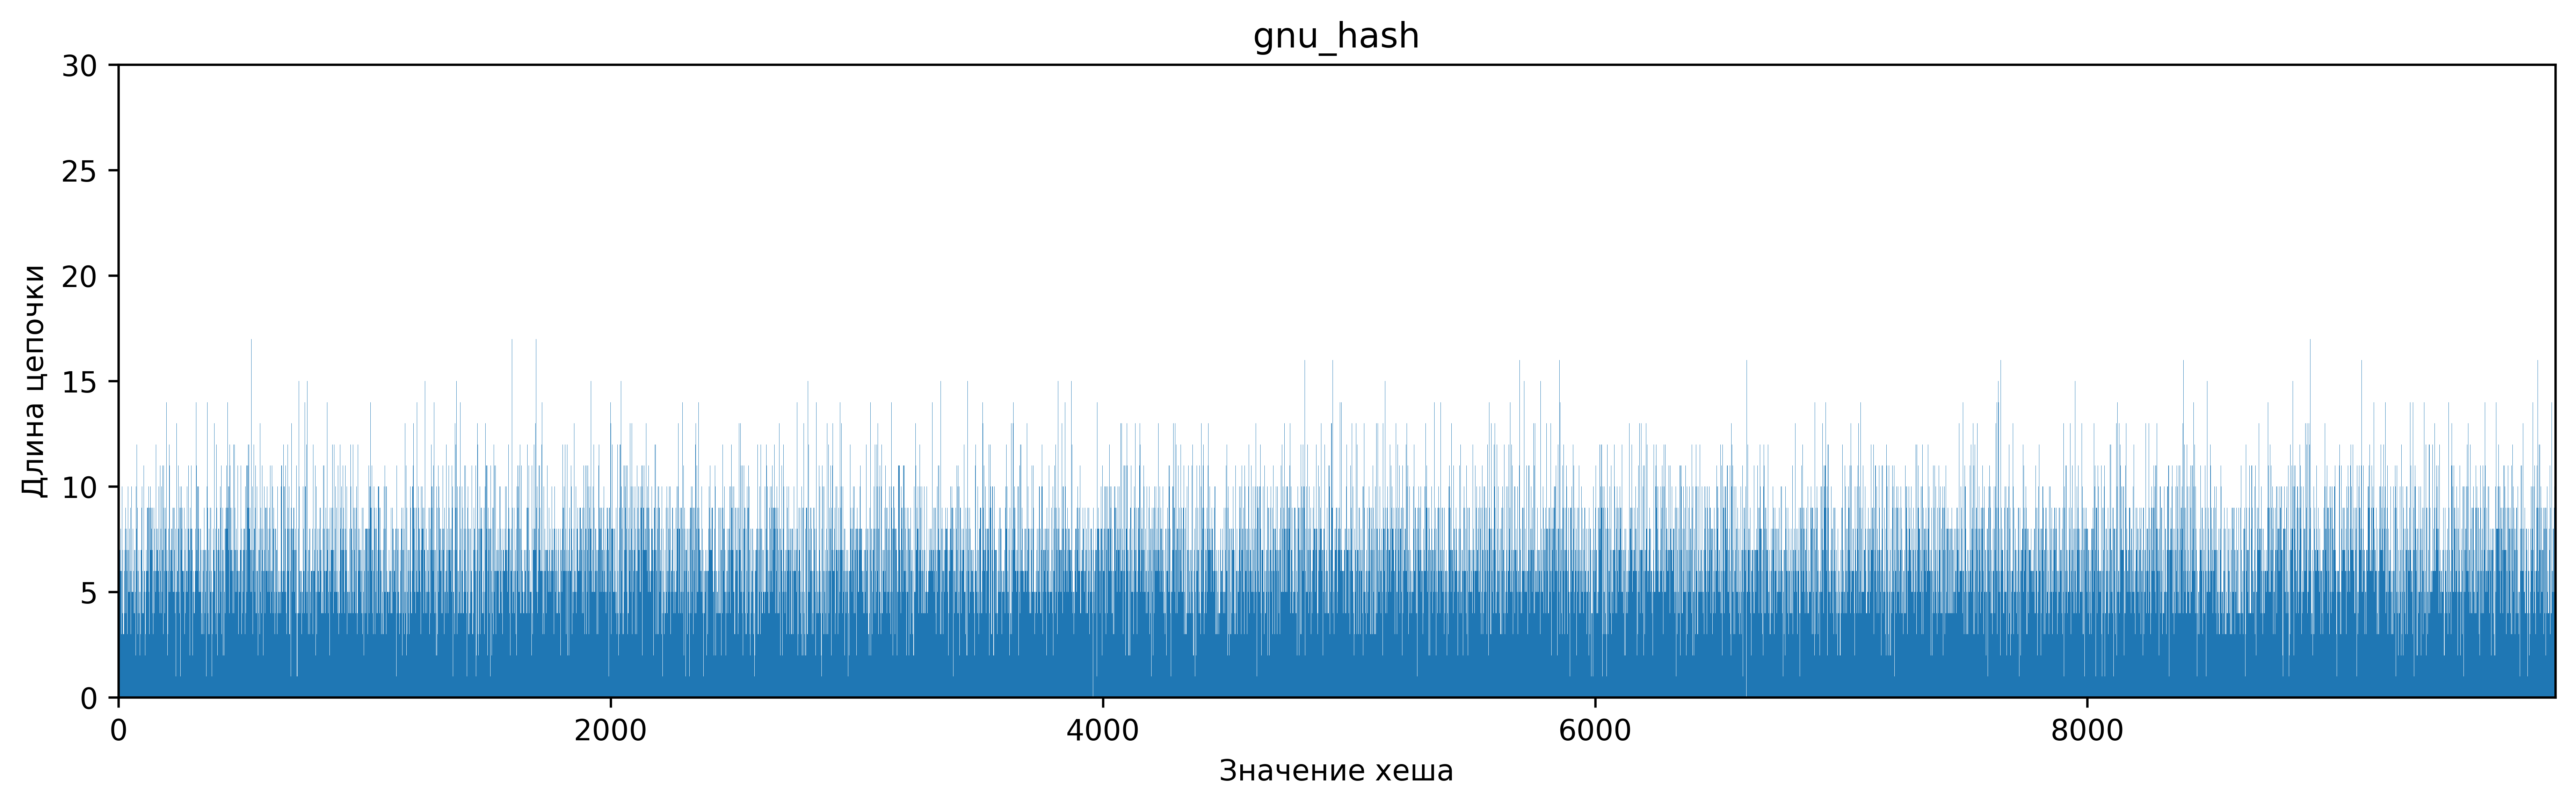

In [134]:
plot_func(gnu_x, gnu_y, "gnu_hash", 9901, 30, 1, 0)

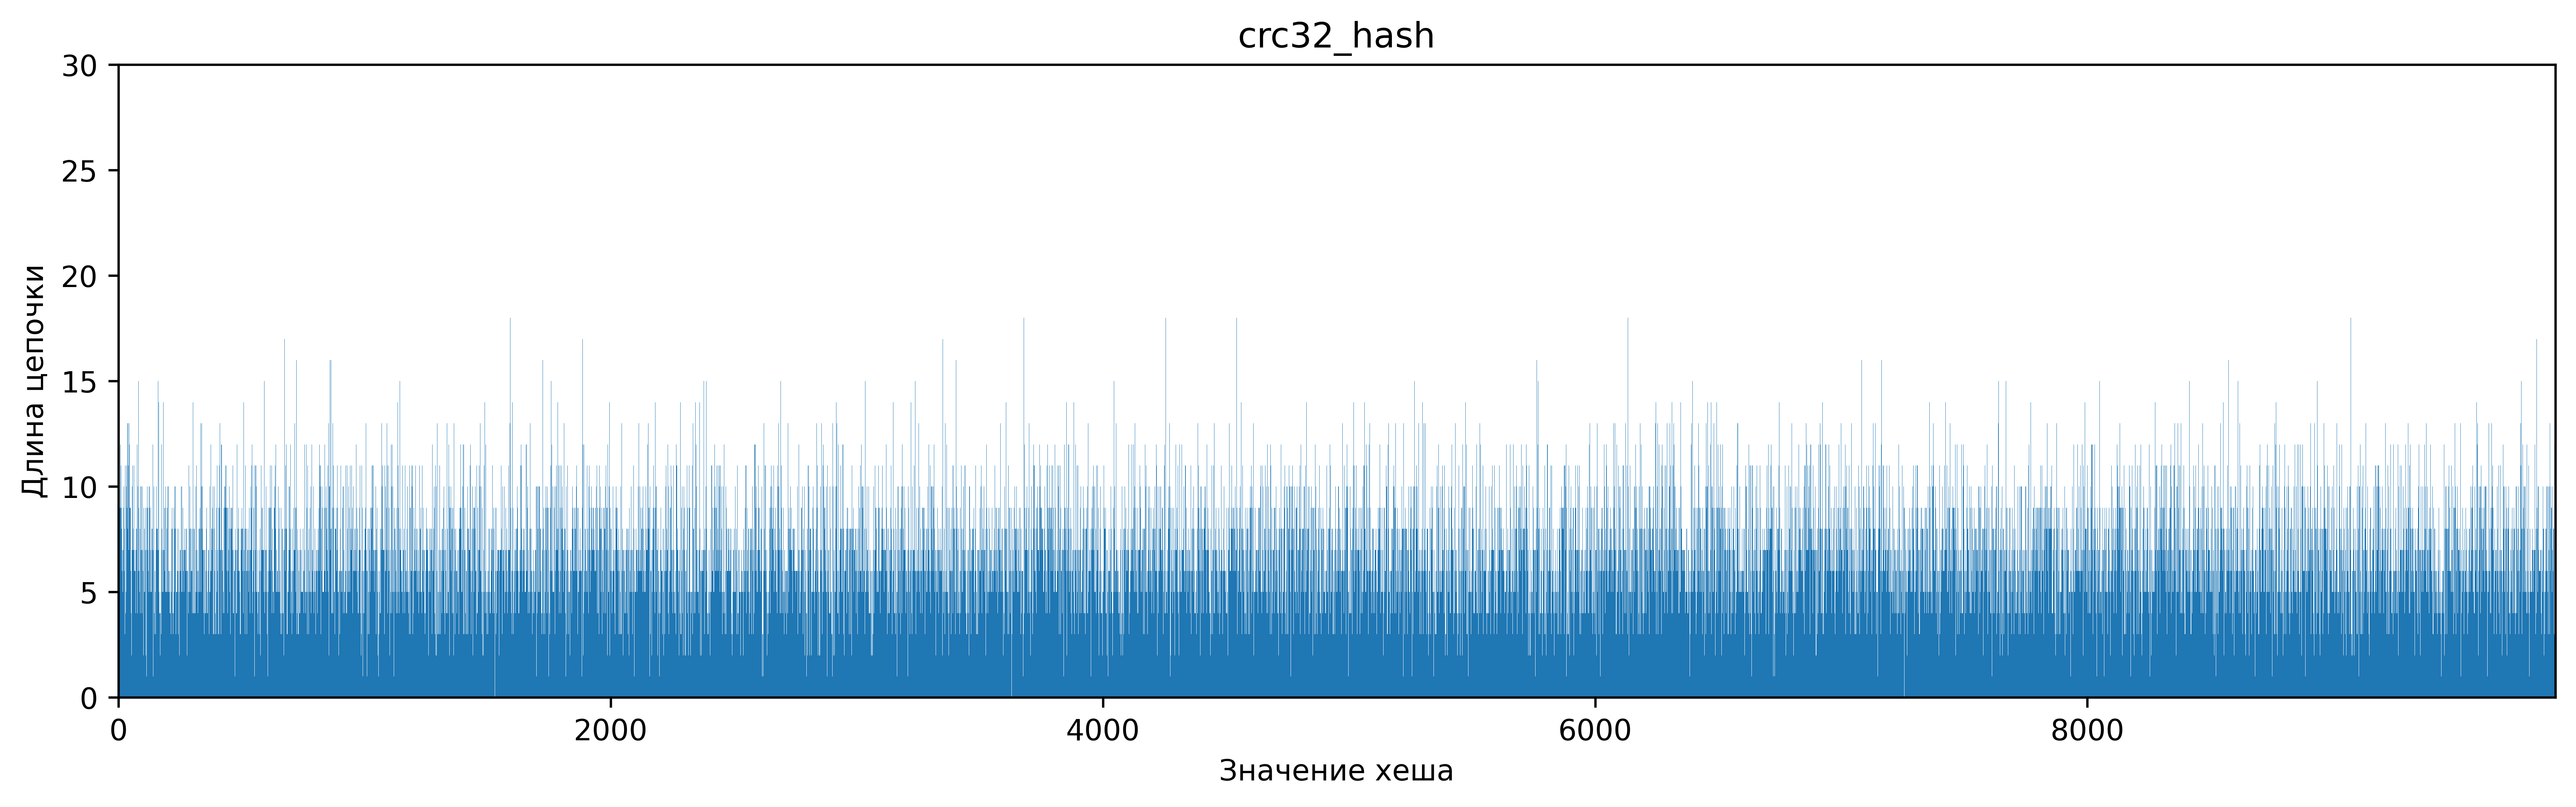

In [135]:
plot_func(crc32_x, crc32_y, "crc32_hash", 9901, 30, 1, 0)

### Вычисление отклонений

In [136]:
def calc_standart_deviation(array):
    array_sum = 0
    arr_len = len(array)

    for i in range(arr_len):
        array_sum += array[i]
    
    mid = array_sum / arr_len

    quadr_sum = 0
    for i in range(arr_len):
        quadr_sum += (array[i] - mid) * (array[i] - mid)
    
    deviation = sqrt(quadr_sum / arr_len)
    return deviation

In [137]:
const_dev = calc_standart_deviation(const_y)
print("const hash deviation =", const_dev)

const hash deviation = 688.3914193440918


In [138]:
first_dev = calc_standart_deviation(first_y)
print("first char deviation =", first_dev)

first char deviation = 155.29638116232783


In [139]:
sum_dev = calc_standart_deviation(sum_y)
print("char sum hash deviation =", sum_dev)

char sum hash deviation = 18.213788329939515


In [140]:
ror_dev = calc_standart_deviation(ror_y)
print("ror hash deviation =", ror_dev)

ror hash deviation = 5.440131383960984


In [120]:
rol_dev = calc_standart_deviation(rol_y)
print("rol hash deviation =", rol_dev)

rol hash deviation = 3.8888504659643015


In [121]:
gnu_dev = calc_standart_deviation(gnu_y)
print("gnu hash deviation =", gnu_dev)

gnu hash deviation = 2.637021447753033


In [122]:
crc32_dev = calc_standart_deviation(crc32_y)
print("crc32 hash deviation =", crc32_dev)

crc32 hash deviation = 2.624582668036472


### Вычисление времен

In [123]:
def get_time(array):
    size = len(array)
    time_sum = 0
    for i in range(size):
        time_sum += array[i]

    time = time_sum / size
    return time

In [124]:
const_time = get_time(const_time_x)
first_time = get_time(first_time_x)
sum_time   = get_time(sum_time_x)
ror_time   = get_time(ror_time_x)
rol_time   = get_time(rol_time_x)
gnu_time   = get_time(gnu_time_x)
crc32_time = get_time(crc32_time_x)

print("const time =", const_time)
print("first_time =", first_time)
print("sum_time =", sum_time)
print("ror_time =", ror_time)
print("rol_time =", rol_time)
print("gnu_time =", gnu_time)
print("crc32_time =", crc32_time)

const time = 12.452999999999998
first_time = 14.698
sum_time = 162.058
ror_time = 254.62533333333332
rol_time = 258.2936666666667
gnu_time = 180.78
crc32_time = 825.5273333333334


In [125]:
def append_to_plot_data(time, name, deviation, names, x, y):
    if deviation < 10:
        x.append(deviation)
        y.append(time)
        names.append(name)

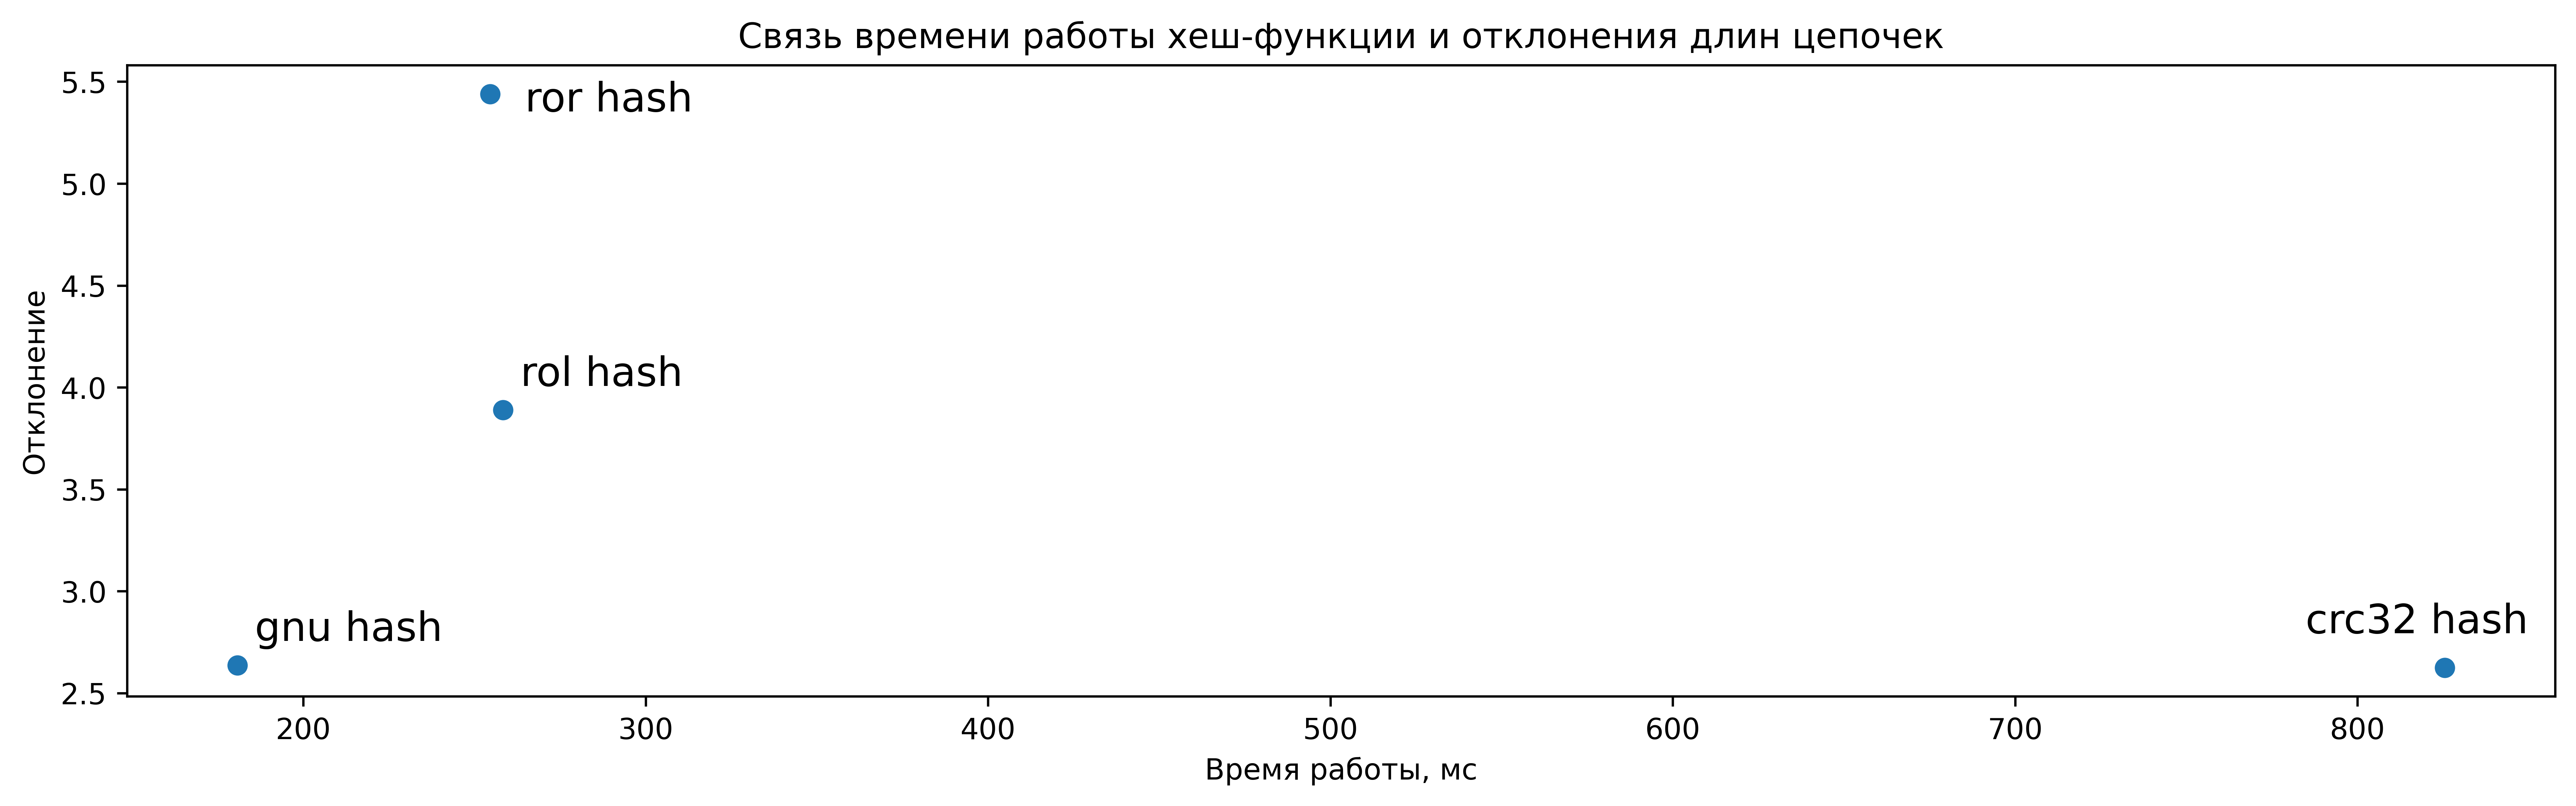

In [126]:
hashes = []
times = []
deviations = []

append_to_plot_data(const_time,      "const hash", const_dev, hashes, deviations, times)
append_to_plot_data(first_time, "first char hash", first_dev, hashes, deviations, times)
append_to_plot_data(sum_time,     "char sum hash", sum_dev,   hashes, deviations, times)
append_to_plot_data(ror_time,          "ror hash", ror_dev,   hashes, deviations, times)
append_to_plot_data(rol_time,          "rol hash", rol_dev,   hashes, deviations, times)
append_to_plot_data(gnu_time,          "gnu hash", gnu_dev,   hashes, deviations, times)
append_to_plot_data(crc32_time,      "crc32 hash", crc32_dev, hashes, deviations, times)

plt.figure(figsize=FIGSIZE, dpi=DPI)
plt.title("Связь времени работы хеш-функции и отклонения длин цепочек")

plt.ylabel("Отклонение")
plt.xlabel("Время работы, мс")

for i in range(len(hashes)):
    if times[i] < 800 and deviations[i] < 4.5:
        plt.annotate(hashes[i], (times[i], deviations[i]), xytext=(50, 70), size=14, textcoords="offset pixels")  
    elif times[i] < 800:
        plt.annotate(hashes[i], (times[i], deviations[i]), xytext=(100, -50), size=14, textcoords="offset pixels")  
    elif deviations[i] < 4.5:
        plt.annotate(hashes[i], (times[i], deviations[i]), xytext=(-400, 100), size=14, textcoords="offset pixels")  



plt.scatter(times, deviations)

plt.savefig("images/time_disturb.png")